In [1]:
library(ggplot2)
library(fpp2)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: forecast
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: fma
Loading required package: expsmooth


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


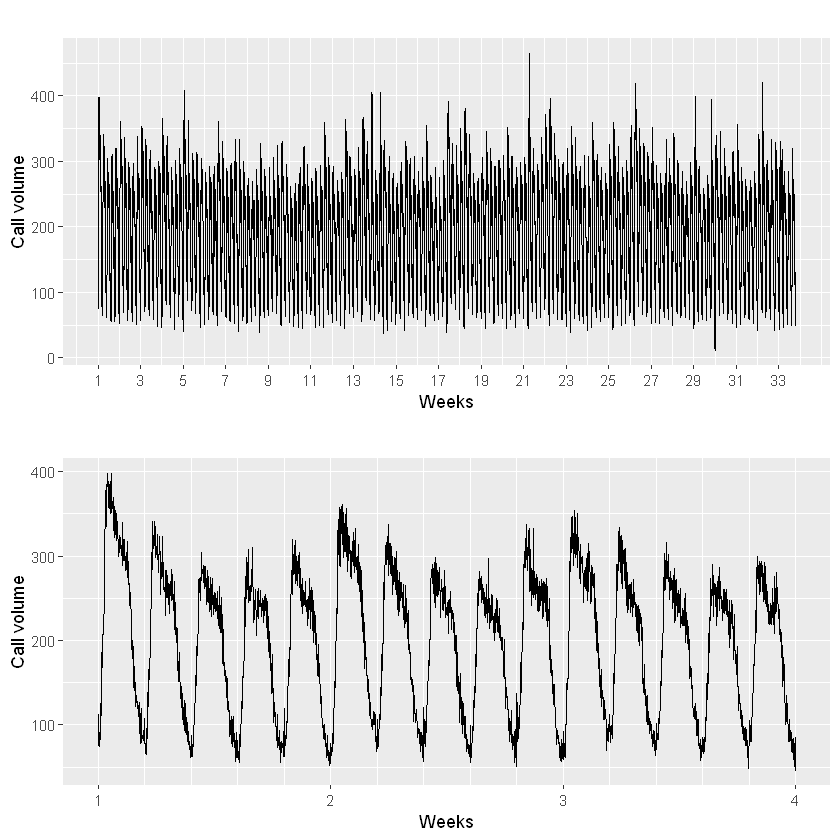

In [2]:
p1 <- autoplot(calls) +
  ylab("Call volume") + xlab("Weeks") +
  scale_x_continuous(breaks=seq(1,33,by=2))

p2 <- autoplot(window(calls, end=4)) +
  ylab("Call volume") + xlab("Weeks") +
  scale_x_continuous(minor_breaks = seq(1,4,by=0.2))
gridExtra::grid.arrange(p1,p2)

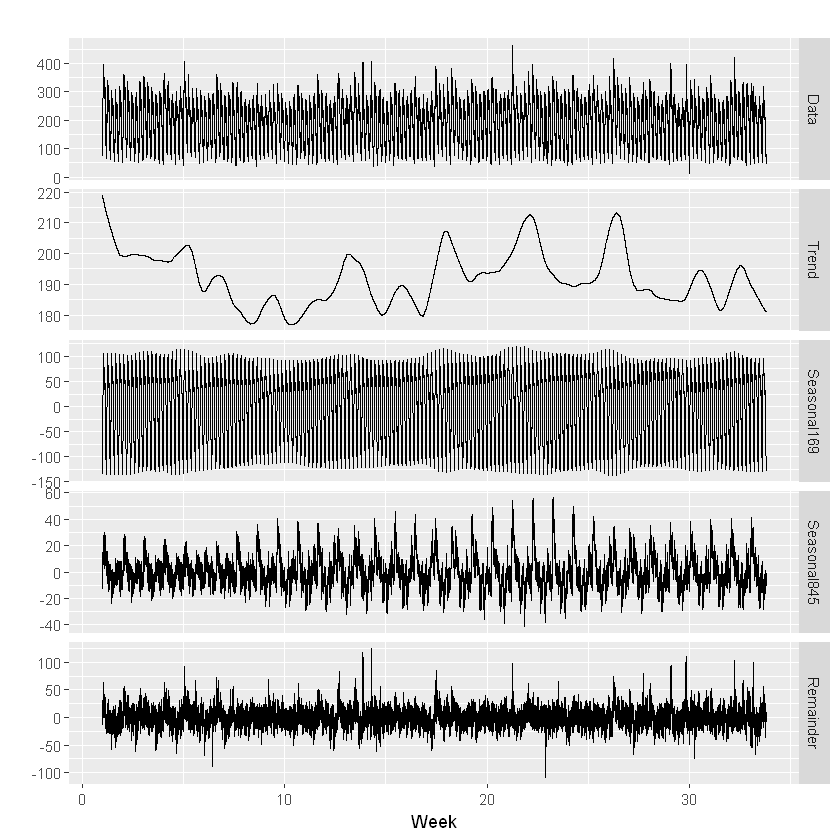

In [3]:
calls %>% mstl() %>%
  autoplot() + xlab("Week")

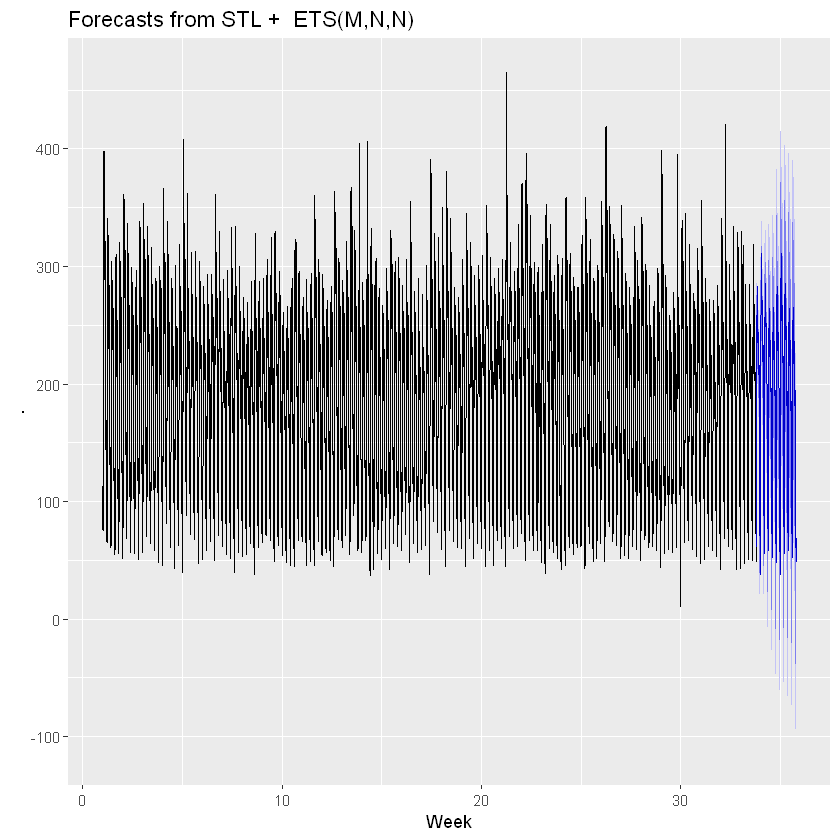

In [7]:
calls %>%  stlf() %>%
  autoplot() + xlab("Week")

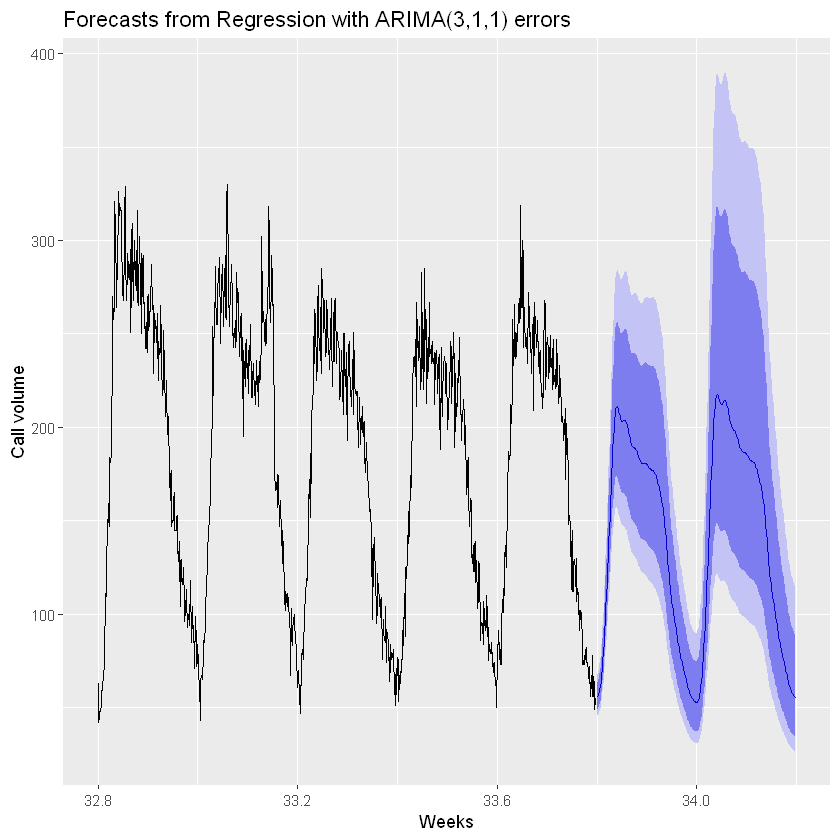

In [5]:
fit <- auto.arima(calls, seasonal=FALSE, lambda=0,
         xreg=fourier(calls, K=c(10,10)))
fit %>%
  forecast(xreg=fourier(calls, K=c(10,10), h=2*169)) %>%
  autoplot(include=5*169) +
    ylab("Call volume") + xlab("Weeks")

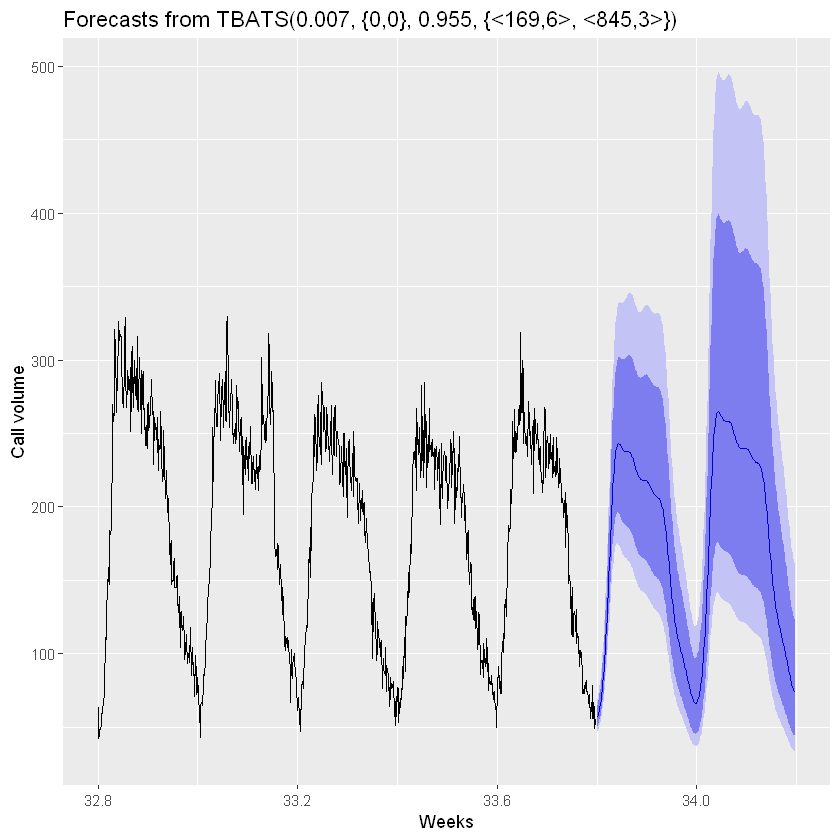

In [6]:
calls %>%
  subset(start=length(calls)-2000) %>%
  tbats() -> fit2
fc2 <- forecast(fit2, h=2*169)
autoplot(fc2, include=5*169) +
  ylab("Call volume") + xlab("Weeks")

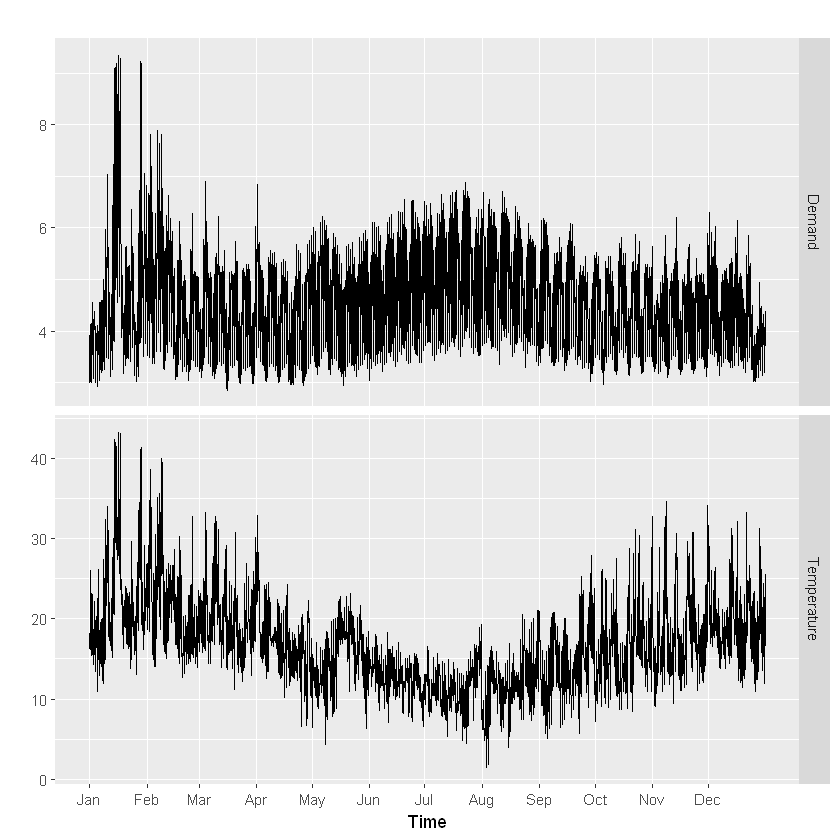

In [7]:
autoplot(elecdemand[,c("Demand","Temperature")],
    facet=TRUE) +
  scale_x_continuous(minor_breaks=NULL,
    breaks=2014+
      cumsum(c(0,31,28,31,30,31,30,31,31,30,31,30))/365,
    labels=month.abb) +
  xlab("Time") + ylab("")

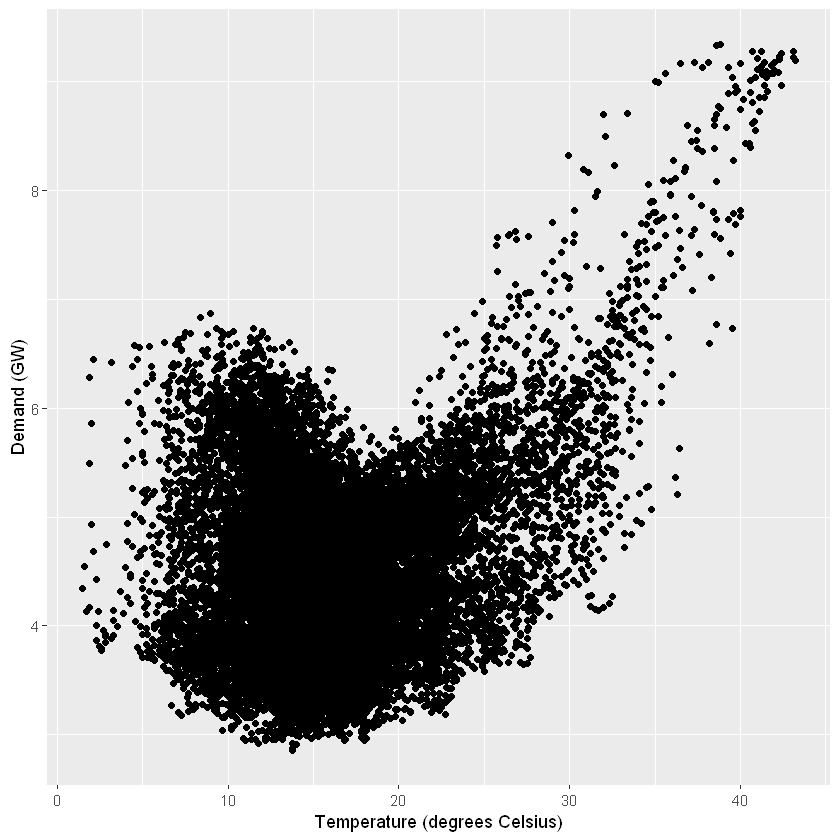

In [8]:
elecdemand %>%
  as.data.frame() %>%
  ggplot(aes(x=Temperature, y=Demand)) + geom_point() +
    xlab("Temperature (degrees Celsius)") +
    ylab("Demand (GW)")

In [9]:
cooling <- pmax(elecdemand[,"Temperature"], 18)
fit <- auto.arima(elecdemand[,"Demand"],
         xreg = cbind(fourier(elecdemand, c(10,10,0)),
               heating=elecdemand[,"Temperature"],
               cooling=cooling))

Warning message in forecast.forecast_ARIMA(fit, xreg = cbind(fourier(temps, c(10, :
"xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order."

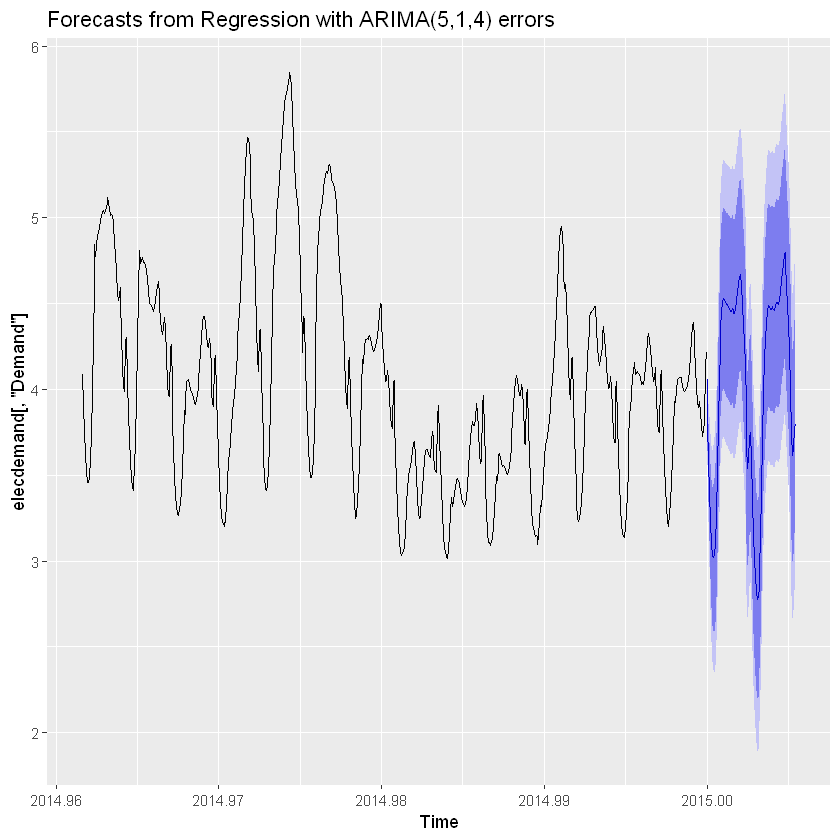

In [10]:
temps <- subset(elecdemand[,"Temperature"],
          start=NROW(elecdemand)-2*48+1)
fc <- forecast(fit,
        xreg=cbind(fourier(temps, c(10,10,0)),
          heating=temps, cooling=pmax(temps,18)))
autoplot(fc, include=14*48)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(5,1,4) errors
Q* = 738314, df = 3455, p-value < 2.2e-16

Model df: 49.   Total lags used: 3504



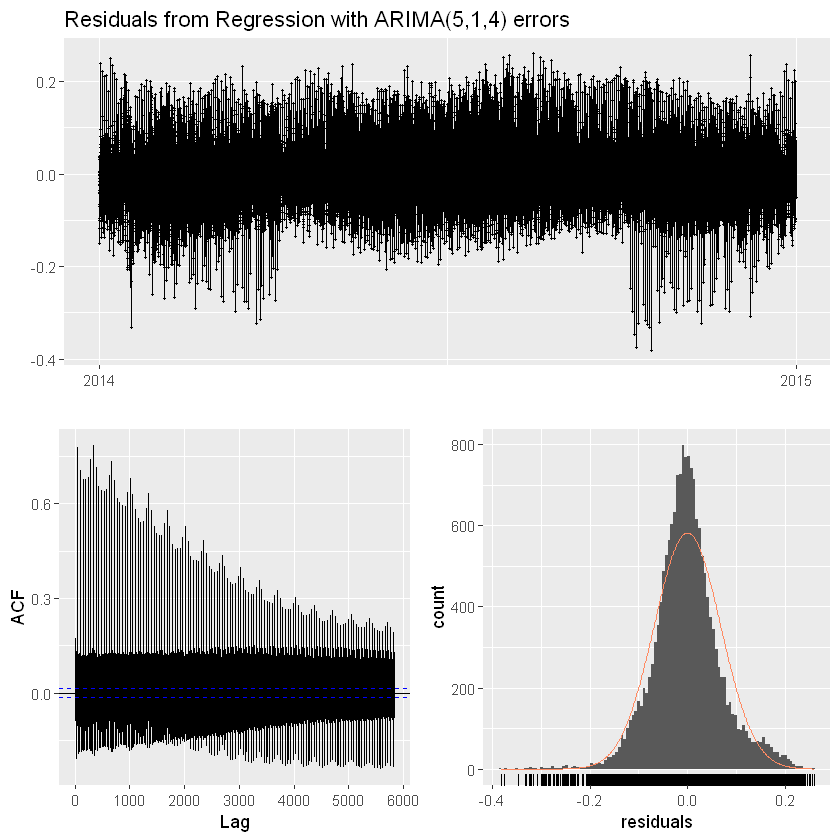

In [11]:
checkresiduals(fc)